In [2]:
%pip install -U imbalanced-learn

import os
import shutil
import pathlib
import PIL
import cv2
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import random
import itertools



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install Pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl (38.1 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import tensorflow as tf

In [7]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow .keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [8]:
from PIL import Image, UnidentifiedImageError


In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [10]:
Path_data = r'C:\Users\syedn\Desktop\Major Pro\diabetic-retinopathy-dataset'

data = os.listdir(Path_data)
Healthy = os.listdir(os.path.join(Path_data, 'Healthy'))
Mild = os.listdir(os.path.join(Path_data, 'Mild DR'))
Moderate = os.listdir(os.path.join(Path_data, 'Moderate DR'))
Proliferate = os.listdir(os.path.join(Path_data, 'Proliferate DR'))
Severe = os.listdir(os.path.join(Path_data, 'Severe DR'))

# Print the contents of the directories
print("Contents of data directory:", data)
print("Contents of Healthy directory:", Healthy)
print("Contents of Mild directory:", Mild)
print("Contents of Moderate directory:", Moderate)
print("Contents of Proliferate directory:", Proliferate)
print("Contents of Severe directory:", Severe)

Contents of data directory: ['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']
Contents of Healthy directory: ['Healthy.png', 'Healthy_10.png', 'Healthy_100.png', 'Healthy_1000.png', 'Healthy_101.png', 'Healthy_102.png', 'Healthy_103.png', 'Healthy_104.png', 'Healthy_105.png', 'Healthy_106.png', 'Healthy_107.png', 'Healthy_108.png', 'Healthy_109.png', 'Healthy_11.png', 'Healthy_110.png', 'Healthy_111.png', 'Healthy_112.png', 'Healthy_113.png', 'Healthy_114.png', 'Healthy_115.png', 'Healthy_116.png', 'Healthy_117.png', 'Healthy_118.png', 'Healthy_119.png', 'Healthy_12.png', 'Healthy_120.png', 'Healthy_121.png', 'Healthy_122.png', 'Healthy_123.png', 'Healthy_124.png', 'Healthy_125.png', 'Healthy_126.png', 'Healthy_127.png', 'Healthy_128.png', 'Healthy_129.png', 'Healthy_13.png', 'Healthy_130.png', 'Healthy_131.png', 'Healthy_132.png', 'Healthy_133.png', 'Healthy_134.png', 'Healthy_135.png', 'Healthy_136.png', 'Healthy_137.png', 'Healthy_138.png', 'Healthy_139.png', 'Hea

In [11]:
print("classes names :", (data), "\n______________________________\n")
print("Number of classes :", len(data), "\n______________________________\n")
print("Number of Healty images :", len(Healthy), "\n______________________________\n")
print("Number of Mild images :", len(Mild),  "\n______________________________\n")
print("Number of Moderate images :", len(Moderate),  "\n______________________________\n")
print("Number of Proliferate images :", len(Proliferate),  "\n______________________________\n")
print("Number of severe images :", len(Severe),  "\n______________________________\n")

classes names : ['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR'] 
______________________________

Number of classes : 5 
______________________________

Number of Healty images : 1000 
______________________________

Number of Mild images : 370 
______________________________

Number of Moderate images : 900 
______________________________

Number of Proliferate images : 290 
______________________________

Number of severe images : 190 
______________________________



In [12]:
# Get Paths

Path_data = r'C:\Users\syedn\Desktop\Major Pro\diabetic-retinopathy-dataset'

# Create two lists to store paths of images and their labels

imgpaths = []
labels =[]


# Convert directory to list

data = os.listdir(Path_data)

# Get paths and Labels of classes and images in data 

for i in data:
    classpath = os.path.join(Path_data, i)
    imglist = os.listdir(classpath)
    
    for img in imglist:
        imgpath = os.path.join(classpath, img)
        
        imgpaths.append(imgpath)
        labels.append(i)


# Convert two lists of imgpaths and their labels into series

Paths = pd.Series(imgpaths, name = 'Paths')
Labels = pd.Series(labels, name = 'Labels')

# Concatenate them in one Dataframe called Tr_data

Df= pd.concat([Paths, Labels], axis = 1)
Df.head(5)

,Paths,Labels
0,C:\Users\syedn\Desktop\Major Pro\diabetic-reti...,Healthy
1,C:\Users\syedn\Desktop\Major Pro\diabetic-reti...,Healthy
2,C:\Users\syedn\Desktop\Major Pro\diabetic-reti...,Healthy
3,C:\Users\syedn\Desktop\Major Pro\diabetic-reti...,Healthy
4,C:\Users\syedn\Desktop\Major Pro\diabetic-reti...,Healthy


In [13]:
#train, valid  and test dataframes
train, testval = train_test_split(Df, test_size = 0.2, shuffle = True, random_state = 123)
valid, test = train_test_split(testval, test_size = 0.5, shuffle = True, random_state = 123)

print("Train shape: ", train.shape)
print("Valid shape: ", valid.shape)
print("Test shape: ",test.shape)

train.Labels.value_counts()

Train shape:  (2200, 2)
Valid shape:  (275, 2)
Test shape:  (275, 2)


Healthy           805
Moderate DR       723
Mild DR           291
Proliferate DR    230
Severe DR         151
Name: Labels, dtype: int64

In [14]:
batch_size = 20   # As smaller, As more data generated ....In views of data size 
img_size = (224, 224) # standard value (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)


#Create generators

tr_G = ImageDataGenerator(
    zca_whitening=True,
    rotation_range=30.,
    fill_mode='nearest',
    )

V_G = ImageDataGenerator()

t_G = ImageDataGenerator()

#Generate Appropriate Data for fitting into model

Train = tr_G.flow_from_dataframe(train, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)
Valid = V_G.flow_from_dataframe(valid, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)
Test = t_G.flow_from_dataframe(test, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = False, batch_size = batch_size)

Found 2200 validated image filenames belonging to 5 classes.
Found 275 validated image filenames belonging to 5 classes.
Found 275 validated image filenames belonging to 5 classes.


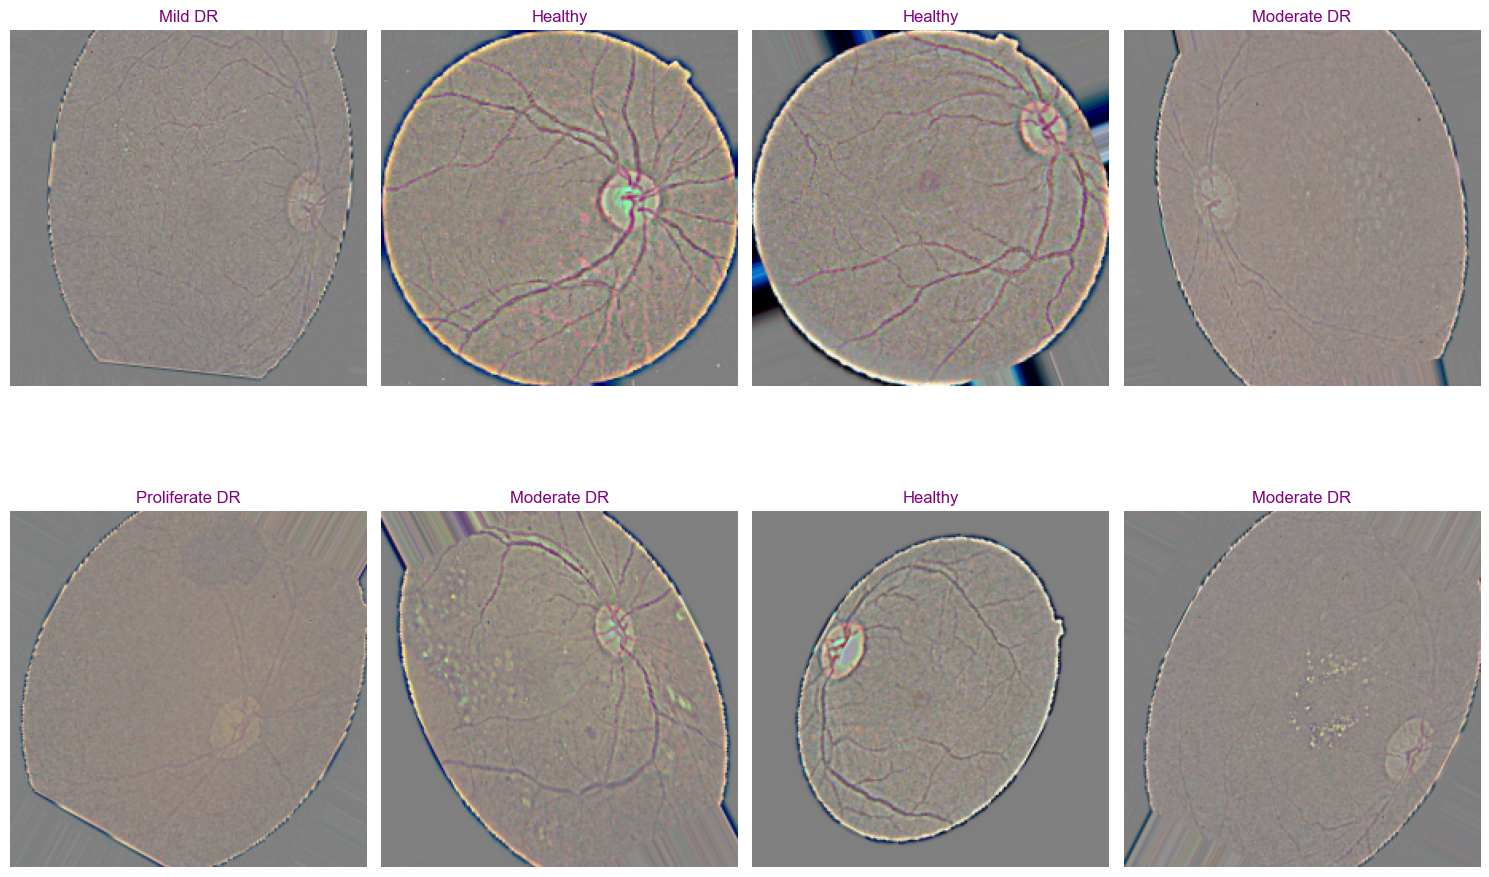

In [15]:
L_index = Train.class_indices
L_index

# Store Labels in a list
Keys = list(L_index.keys())
Keys

#Get a sample batch
imgs, labels = next(Train)

# Visualization
plt.figure(figsize= (15, 15))

for i in range(8):
    plt.subplot(3, 4, i +1)
    im = imgs[i]/255
    plt.imshow(im)
    
    #Labelling
    index = np.argmax(labels[i])
    label = Keys[index]
    plt.title(label, color = 'purple')
    plt.axis('off')
    
plt.tight_layout()    
plt.show()

In [16]:
# Define number of classes 
n_classes = len(list(Train.class_indices.keys()))
n_classes

img_shape=(img_size[0], img_size[1], 3)
model_name='EfficientNetB3'
base_model= EfficientNetB3(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max') 

# Note you are always told NOT to make the base model trainable initially- that is WRONG you get better results leaving it trainable
base_model.trainable=True
x=base_model.output
x=BatchNormalization(axis=-1, momentum=0.999, epsilon=0.001 )(x)
x = Dense(1024, kernel_regularizer = regularizers.l2(l = 0.01),activity_regularizer=regularizers.l1(0.005),
                bias_regularizer=regularizers.l1(0.005) ,activation='relu')(x)
x=Dropout(rate=.2, seed=123)(x)
x = Dense(512, kernel_regularizer = regularizers.l2(l = 0.01),activity_regularizer=regularizers.l1(0.005),
                bias_regularizer=regularizers.l1(0.005) ,activation='relu')(x)
x=Dropout(rate=.3, seed=123)(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.01),activity_regularizer=regularizers.l1(0.005),
                bias_regularizer=regularizers.l1(0.005) ,activation='relu')(x)
x=Dropout(rate=.4, seed=123)(x)
output=Dense(n_classes, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)
lr=.0001 # start with this learning rate

In [17]:
model=Sequential()
model.add(base_model)
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='elu'))
model.add(Dense(256, activation='elu'))
model.add(Dense(128, activation = 'elu'))
model.add(Dense(5, activation='softmax'))

In [18]:
model.compile(
    Adamax(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['acc']
)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 dropout_3 (Dropout)         (None, 1536)              0         
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               786944    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                        

In [20]:
%pip install pydot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import os

file_path = 'model_Visualization.png'

if os.path.exists(file_path):
    Image(filename=file_path)
else:
    print(f"The file '{file_path}' does not exist.")


The file 'model_Visualization.png' does not exist.


In [42]:
import os
os.getcwd()

'c:\\Users\\syedn\\Desktop\\Major Pro'

In [23]:
epochs = 50
history = model.fit(x= Train, epochs= epochs, verbose= 1, validation_data= Valid, validation_steps= None, shuffle= False)

Epoch 1/50
110/110 [==============================] - 515s 4s/step - loss: 1.7535 - acc: 0.4855 - val_loss: 1.7652 - val_acc: 0.4109
Epoch 2/50
110/110 [==============================] - 448s 4s/step - loss: 1.3124 - acc: 0.5523 - val_loss: 1.1768 - val_acc: 0.5564
Epoch 3/50
110/110 [==============================] - 441s 4s/step - loss: 1.1356 - acc: 0.6005 - val_loss: 0.9925 - val_acc: 0.5964
Epoch 4/50
110/110 [==============================] - 464s 4s/step - loss: 1.0328 - acc: 0.6186 - val_loss: 0.9739 - val_acc: 0.5891
Epoch 5/50
110/110 [==============================] - 445s 4s/step - loss: 0.9731 - acc: 0.6286 - val_loss: 0.8974 - val_acc: 0.6545
Epoch 6/50
110/110 [==============================] - 443s 4s/step - loss: 0.9176 - acc: 0.6459 - val_loss: 0.8916 - val_acc: 0.6691
Epoch 7/50
110/110 [==============================] - 442s 4s/step - loss: 0.9060 - acc: 0.6682 - val_loss: 0.8470 - val_acc: 0.7018
Epoch 8/50
110/110 [==============================] - 446s 4s/step - 

In [24]:
# accuracy and loss of Train

tr_acc = history.history['acc']
tr_loss = history.history['loss']


# accuracy and loss or Valid\

v_acc = history.history['val_acc']
v_loss = history.history['val_loss']


# highest value of v_acc by getting its index

index_acc = np.argmax(v_acc)
high_Vacc = v_acc[index_acc]


# lowest value of v_loss by getting index

index_loss = np.argmin(v_loss)
low_Vloss = v_loss[index_loss]


# n. of epochs based on length of tr_acc values

Epochs =[]
for i in range(len(tr_acc)):
    Epochs.append (i+1)

    
# Define best epoch

best_acc = f'Best epoch ={str(index_acc +1)}'
best_loss = f'Best epoch ={str(index_loss+1)}'

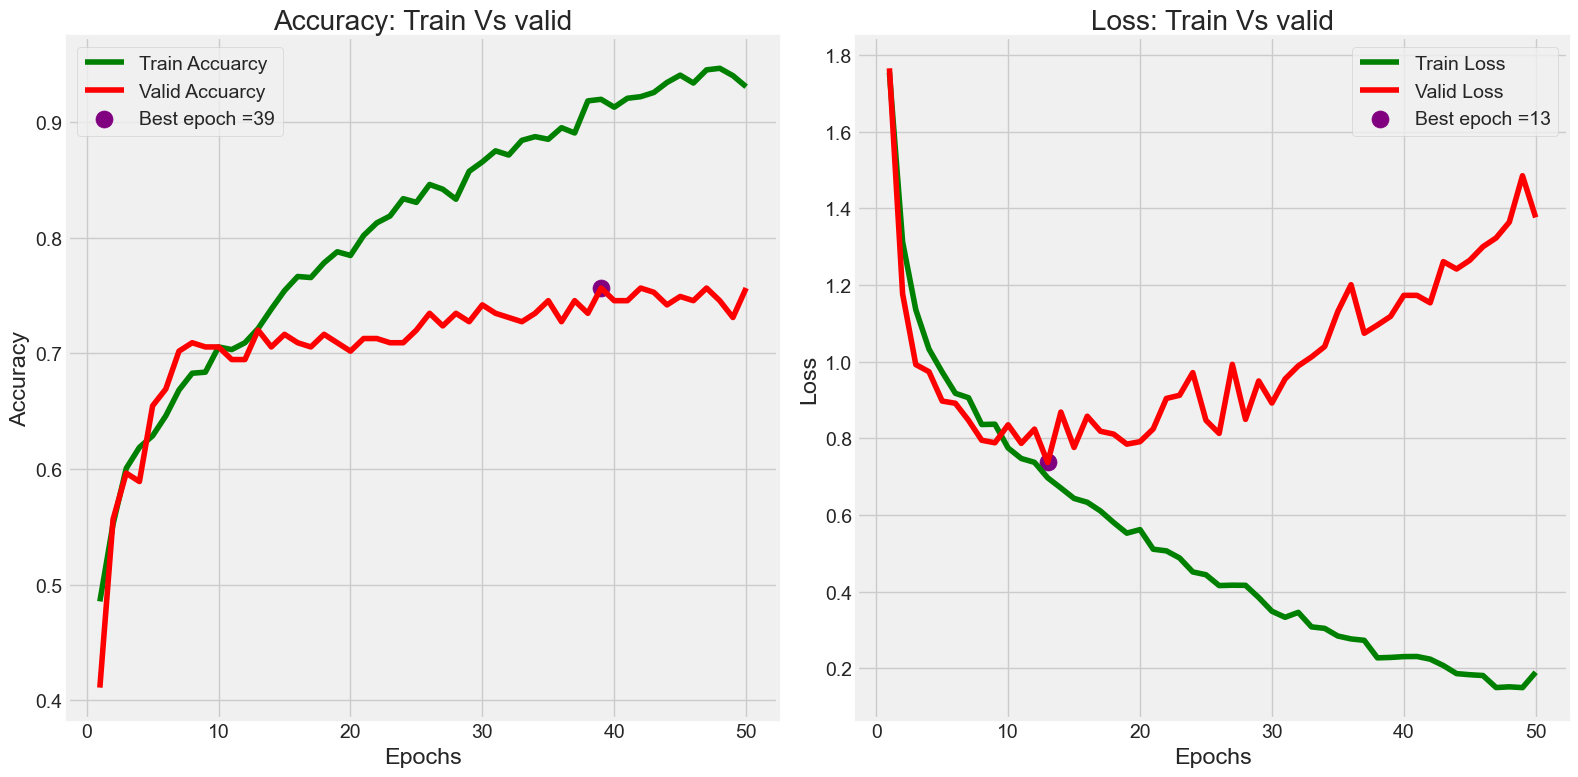

In [25]:
plt.figure(figsize = (16, 8))
plt.style.use('fivethirtyeight')


plt.subplot(1,2,1)
plt.plot(Epochs, tr_acc, "g", label = "Train Accuarcy")
plt.plot(Epochs, v_acc, "r", label = "Valid Accuarcy")
plt.scatter(index_acc+1, high_Vacc, s= 150, color = 'purple', label = best_acc)

plt.title("Accuracy: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(Epochs, tr_loss, "g", label = "Train Loss")
plt.plot(Epochs, v_loss, "r", label = "Valid Loss")
plt.scatter(index_loss+1, low_Vloss, s= 150, color = 'purple', label = best_loss)

plt.title("Loss: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [26]:
# Define Vars
Train_sc = model.evaluate(Train, verbose = 1)
Valid_sc = model.evaluate(Valid, verbose = 1)
Test_sc =model.evaluate(Test, verbose = 1)

#Print
print('Train Scores : \n    accuracy:', Train_sc[1], '\n      Loss: ', Train_sc[0], '\n________________________')
print('Valid Scores : \n    accuracy:', Valid_sc[1], '\n      Loss: ', Valid_sc[0], '\n________________________')
print('Test Scores : \n    accuracy:', Test_sc[1], '\n      Loss: ', Test_sc[0], '\n________________________')

14/14 [==============================] - 12s 811ms/step - loss: 1.1415 - acc: 0.7491
Train Scores : 
    accuracy: 0.985909104347229 
      Loss:  0.046790868043899536 
________________________
Valid Scores : 
    accuracy: 0.7563636302947998 
      Loss:  1.3762478828430176 
________________________
Test Scores : 
    accuracy: 0.7490909099578857 
      Loss:  1.1415488719940186 
________________________


In [27]:
predictions = model.predict_generator(Test)
y_pred = np.argmax(predictions, axis = 1)

#Check
print(predictions)
print(y_pred)

[[9.99980688e-01 1.40896118e-05 5.04246373e-06 2.38965299e-07
  1.24709010e-09]
 [9.99991775e-01 8.23509072e-06 4.82682516e-09 1.01849085e-10
  5.75676009e-12]
 [3.27533036e-01 3.65057260e-01 3.06984872e-01 5.49167589e-06
  4.19281452e-04]
 ...
 [1.51337124e-03 2.53539323e-03 4.81838405e-01 3.21410030e-01
  1.92702770e-01]
 [1.00000000e+00 2.28058197e-11 1.95132102e-15 8.33728409e-18
  4.53148306e-19]
 [2.67117633e-03 1.61659587e-02 3.23172241e-01 5.66561460e-01
  9.14291292e-02]]
[0 0 1 3 2 2 2 2 2 2 1 0 0 1 3 4 2 4 2 0 1 0 0 2 2 2 2 1 2 0 2 0 1 4 0 1 2
 4 4 1 1 0 2 0 4 2 0 2 0 2 2 2 2 0 1 1 1 1 2 1 0 2 2 2 1 2 3 1 0 2 0 4 0 0
 4 2 0 2 0 0 2 2 1 2 0 4 0 2 2 3 1 4 2 1 1 1 0 2 1 1 0 2 0 3 0 0 0 0 0 2 2
 1 2 0 0 2 0 0 1 2 0 2 0 2 2 4 2 0 0 2 0 1 2 2 1 1 2 0 1 0 0 0 0 1 0 0 1 0
 0 2 0 0 1 0 2 0 1 2 2 2 2 2 0 2 2 1 0 2 2 0 2 0 2 1 0 2 0 1 1 2 0 0 1 4 1
 0 2 1 4 4 2 0 0 0 0 0 2 2 4 2 2 3 0 2 0 0 2 2 2 0 2 0 2 2 0 0 1 0 4 0 1 2
 2 1 2 2 0 2 0 0 2 0 0 0 1 4 2 0 2 2 2 0 1 2 0 4 0 0 0 0 0 2 2 1

In [28]:
# Use n. of keys of  Class indices to greate confusion matrix
Test_cl_ind = Test.class_indices
 
# Get Keys
classes = list(Test_cl_ind.keys())

#CM
cm = confusion_matrix(Test.classes, y_pred)
cm

array([[92,  0,  0,  0,  0],
       [ 3, 29,  9,  0,  0],
       [ 5, 17, 71,  1,  6],
       [ 0,  4,  8,  6,  5],
       [ 1,  0, 10,  0,  8]], dtype=int64)

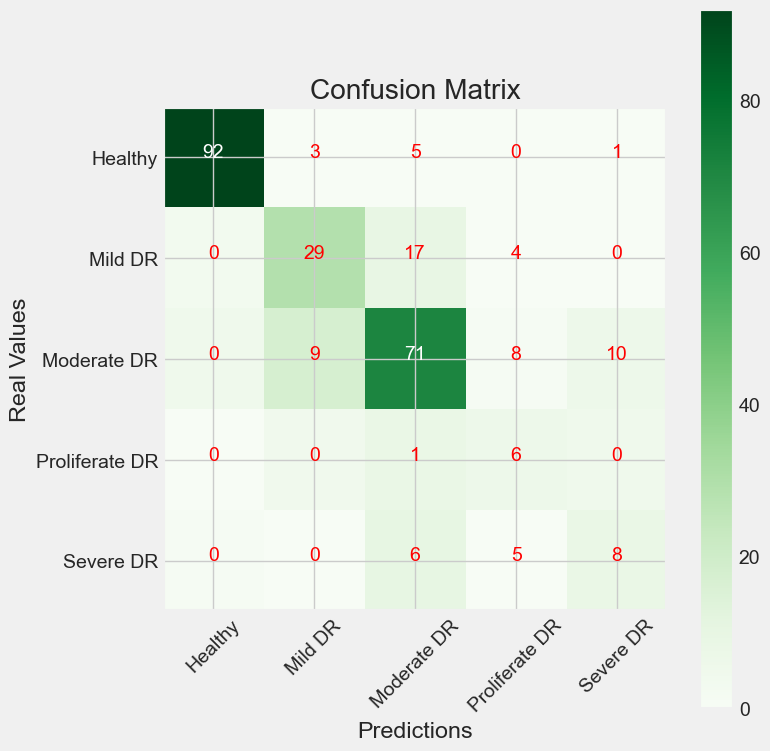

In [29]:
#visualise it
plt.figure(figsize =(8, 8))
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes,rotation = 45)
plt.yticks(tick_marks, classes)

thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(i, j, cm[i, j], horizontalalignment = 'center', color = 'white' if cm[i,j] > thresh  else 'red')
    
plt.tight_layout()
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.show()

In [30]:
# Calssification Report
print(classification_report(Test.classes, y_pred, target_names = classes))

                precision    recall  f1-score   support

       Healthy       0.91      1.00      0.95        92
       Mild DR       0.58      0.71      0.64        41
   Moderate DR       0.72      0.71      0.72       100
Proliferate DR       0.86      0.26      0.40        23
     Severe DR       0.42      0.42      0.42        19

      accuracy                           0.75       275
     macro avg       0.70      0.62      0.63       275
  weighted avg       0.76      0.75      0.74       275



In [ ]:
model.save('effB3_CNN_DR_model.h5')